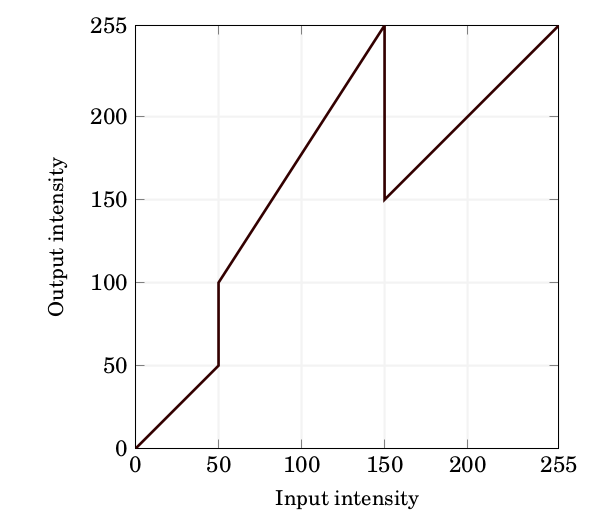

In [88]:
def intensity_transformation_pixel(pix_val:int)->int:
    if 50 <= pix_val and pix_val <= 150:
        return 1.55*pix_val + 22.5
    else:
        return pix_val
    
def intensity_transformation_img(img:np.ndarray)->np.ndarray:
    # for plotting uint8 and float32 images are supported
    new_img = np.zeros(img.shape, dtype=np.uint8)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            pixel = img[i][j]
            
            new_img[i][j] = intensity_transformation_pixel(pixel)
    
    
    return np.array(new_img, dtype=np.uint8)


In [89]:
import numpy as np
import cv2 

# since the image in the assignment is grayscale
img = cv2.imread("a1images/emma.jpg", cv2.IMREAD_GRAYSCALE)

# create a new np array with the shape of the image
new_img = intensity_transformation_img(img)

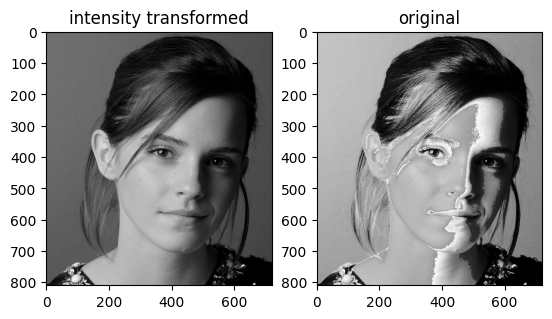

In [90]:


# show image using matplotlib 
import matplotlib.pyplot as plt

# show original image and transformed image side by side
plt.subplot(1, 2, 2)
plt.title("original")
plt.imshow(new_img, cmap='gray')

plt.subplot(1, 2, 1)
plt.title("intensity transformed")
plt.imshow(img, cmap='gray')

Q2.

(217, 181)

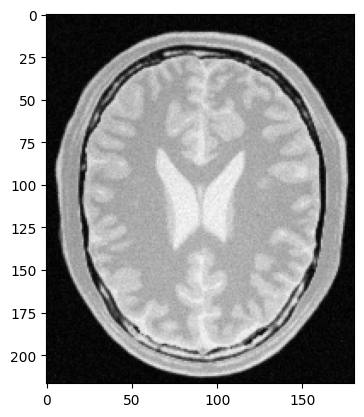

In [91]:
brain_proton_img = cv2.imread("a1images/brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(brain_proton_img, cmap='gray')
brain_proton_img.shape

In [92]:
brain_proton_img.dtype

dtype('uint8')

In [93]:
intensity_transformed_brain_proton_img = intensity_transformation_img(brain_proton_img)
intensity_transformed_brain_proton_img.shape


(217, 181)

In [94]:
intensity_transformed_brain_proton_img[2][3]

5

In [95]:
intensity_transformed_brain_proton_img.dtype

dtype('uint8')

TypeError: Image data of dtype object cannot be converted to float

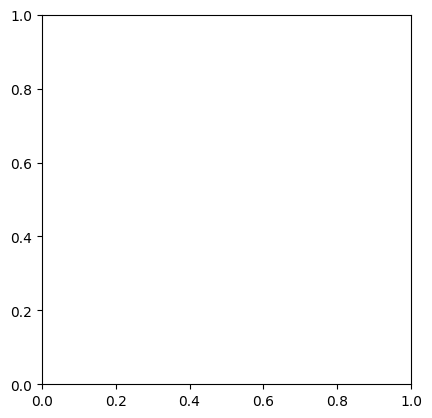

In [96]:
plt.imshow(intensity_transformation_img)

In [98]:
# Q3 

bgr_img = cv2.imread("a1images/highlights_and_shadows.jpg")

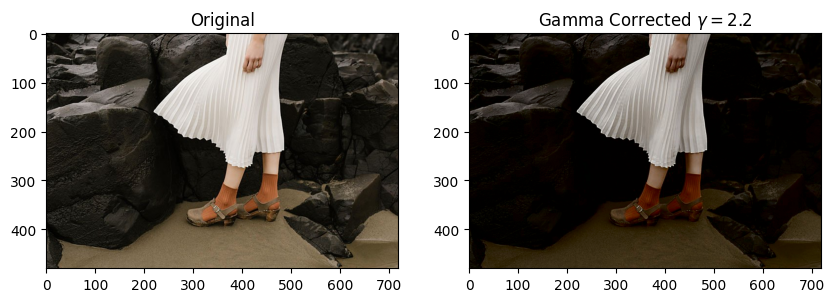

In [116]:
import cv2
import numpy as np

# Convert RGB image to LAB color space
lab_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2LAB)

# Split into L, A, and B channels
L, A, B = cv2.split(lab_img)

# Normalize L channel to [0, 1]
L = L / 255.0

# Apply gamma correction with gamma = 0.8
gamma = 2.2
L_gamma_corrected = np.power(L, gamma)

# Rescale to [0, 255] and convert to uint8
L_gamma_corrected = np.uint8(L_gamma_corrected * 255)

# Merge the corrected L channel with the original A and B channels
lab_gamma_corrected = cv2.merge((L_gamma_corrected, A, B))

# Convert back to RGB color space
gamma_corrected_img = cv2.cvtColor(lab_gamma_corrected, cv2.COLOR_LAB2BGR)

# Display original and the gamma corrected images side by side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot on the first subplot
axs[0].set_title("Original")
axs[0].imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))

# Plot on the second subplot
axs[1].set_title("Gamma Corrected $\gamma = 2.2$")
axs[1].imshow(cv2.cvtColor(gamma_corrected_img, cv2.COLOR_BGR2RGB))

# Show the figure
plt.show()


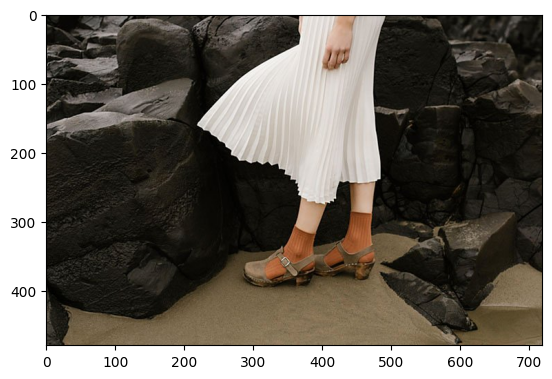